In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso,Ridge


In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


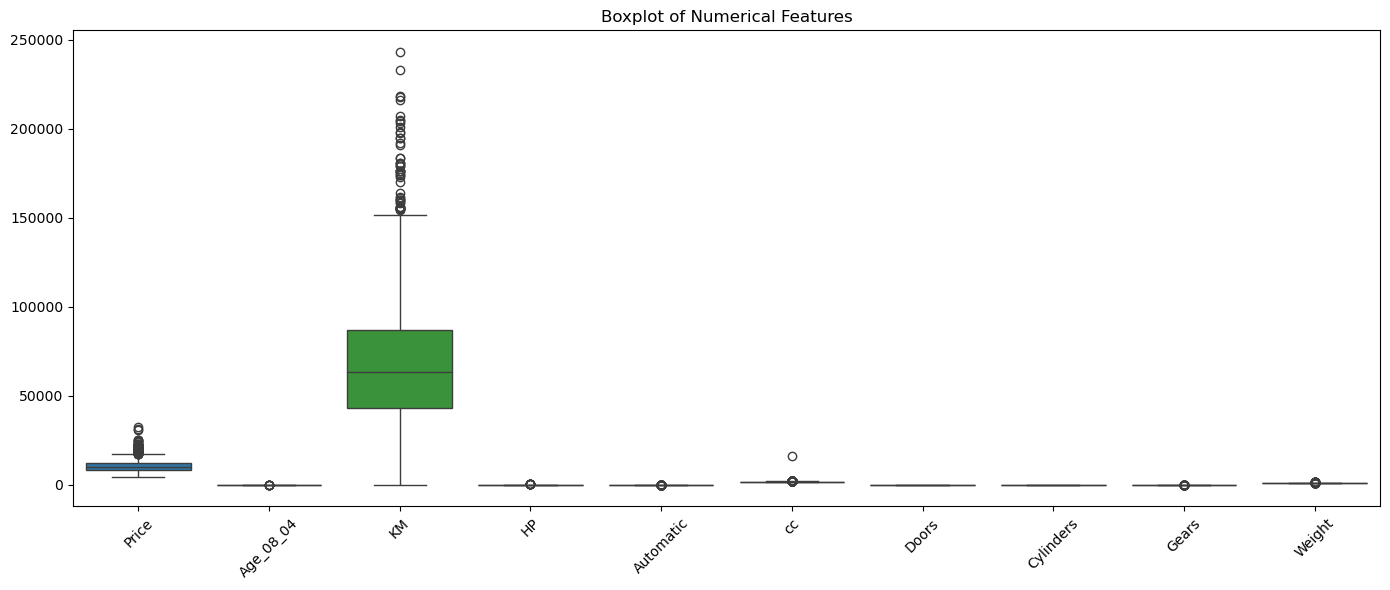

In [7]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include='int64'))
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.tight_layout()
plt.show()

In [8]:
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)


In [9]:
df.corr()['Price'].sort_values()


Age_08_04          -0.876590
KM                 -0.569960
Fuel_Type_Petrol   -0.038516
Automatic           0.033081
Fuel_Type_Diesel    0.054084
Gears               0.063104
cc                  0.126389
Doors               0.185326
HP                  0.314990
Weight              0.581198
Price               1.000000
Cylinders                NaN
Name: Price, dtype: float64

In [10]:
b=df.corr()['Gears'].sort_values(ascending=False)
c=df['Gears'].value_counts()
print(c)
print(b)

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64
Gears               1.000000
HP                  0.209477
Fuel_Type_Petrol    0.063182
Price               0.063104
Weight              0.020613
KM                  0.015023
cc                  0.014629
Age_08_04          -0.005364
Fuel_Type_Diesel   -0.048847
Automatic          -0.098555
Doors              -0.160141
Cylinders                NaN
Name: Gears, dtype: float64


In [11]:
df = df.drop(columns=["Cylinders", "Gears"])

In [12]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,1165,True,False
1,13750,23,72937,90,0,2000,3,1165,True,False
2,13950,24,41711,90,0,2000,3,1165,True,False
3,14950,26,48000,90,0,2000,3,1165,True,False
4,13750,30,38500,90,0,2000,3,1170,True,False


In [13]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers



In [1]:
numerical_col=df.select_dtypes(include=['float64','int64']).columns
numerical_col

NameError: name 'df' is not defined

In [15]:
for i in numerical_col:
    count=detect_outliers_iqr(df,i)
    print(f"Number of ouliers in {i} : {len(count)}")

Number of ouliers in Price : 110
Number of ouliers in Age_08_04 : 7
Number of ouliers in KM : 49
Number of ouliers in HP : 11
Number of ouliers in Automatic : 80
Number of ouliers in cc : 123
Number of ouliers in Doors : 0
Number of ouliers in Weight : 66


In [16]:
def treat_outliers(df,numeric_cols):
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,np.where(df[col] > upper, upper, df[col]))
    return df
df=treat_outliers(df,numerical_col)

In [17]:
for i in numerical_col:
    count=detect_outliers_iqr(df,i)
    print(f"Number of ouliers in {i} : {len(count)}")

Number of ouliers in Price : 0
Number of ouliers in Age_08_04 : 0
Number of ouliers in KM : 0
Number of ouliers in HP : 0
Number of ouliers in Automatic : 0
Number of ouliers in cc : 0
Number of ouliers in Doors : 0
Number of ouliers in Weight : 0


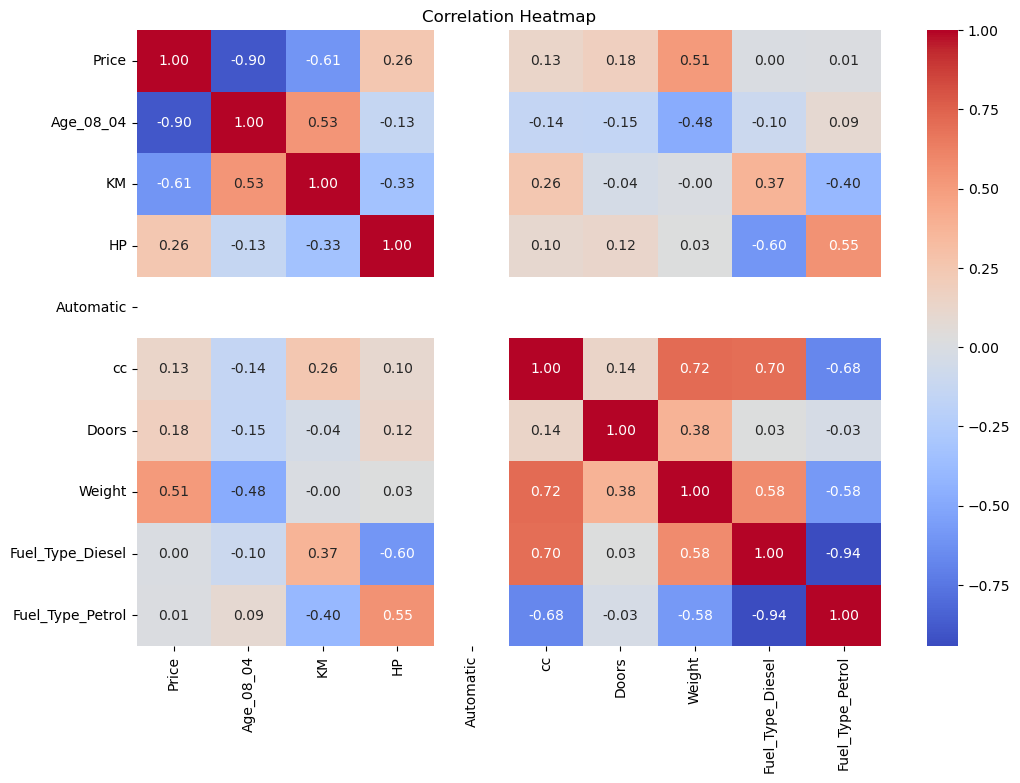

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [19]:
X = df.drop(columns=["Price"])   # All columns except Price
y = df["Price"]  

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (1148, 9)
Testing Set Shape: (288, 9)


In [23]:
# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred1 = model1.predict(X_test_scaled)

In [25]:
print("Model 1: All Features")
print("R² Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

Model 1: All Features
R² Score: 0.8626684189497995
RMSE: 1086.2364394708688


In [26]:
coeff_df1 = pd.DataFrame(model1.coef_, index=X.columns, columns=["Coefficient"])
print("\nCoefficients:\n", coeff_df1)


Coefficients:
                    Coefficient
Age_08_04        -1.993792e+03
KM               -4.971574e+02
HP                3.597646e+02
Automatic         1.136868e-13
cc               -4.279352e+02
Doors            -9.308505e+01
Weight            9.537357e+02
Fuel_Type_Diesel  3.706002e+02
Fuel_Type_Petrol  4.288302e+02


In [27]:
# Select top features manually
top_features = ["Age_08_04", "KM", "Weight", "HP", "Fuel_Type_Diesel", "Fuel_Type_Petrol"]
X_top = df[top_features]
y = df["Price"]

In [28]:
# Train-test split & scale
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top, y, test_size=0.2, random_state=42)
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

In [29]:
# Model 2
model2 = LinearRegression()
model2.fit(X_train2_scaled, y_train2)
y_pred2 = model2.predict(X_test2_scaled)

In [30]:
# Evaluation
print("\nModel 2: Selected Top Features")
print("R² Score:", r2_score(y_test2, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred2)))


Model 2: Selected Top Features
R² Score: 0.8603847035131714
RMSE: 1095.230827142649


In [31]:
# Coefficients
coeff_df2 = pd.DataFrame(model2.coef_, index=top_features, columns=["Coefficient"])
print("\nCoefficients:\n", coeff_df2)


Coefficients:
                   Coefficient
Age_08_04        -2042.318151
KM                -529.952545
Weight             828.935844
HP                  53.779143
Fuel_Type_Diesel   -65.151587
Fuel_Type_Petrol   396.506115


In [32]:
# Collect results
evaluation_results = {
    "Model": ["All Features", "Top Features"],
    "R² Score": [
        r2_score(y_test, y_pred1),
        r2_score(y_test2, y_pred2),
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred1)),
        np.sqrt(mean_squared_error(y_test2, y_pred2)),
    ]
}

eval_df = pd.DataFrame(evaluation_results)
print(eval_df)


          Model  R² Score         RMSE
0  All Features  0.862668  1086.236439
1  Top Features  0.860385  1095.230827


In [68]:
# Apply Lasso Regression with alpha (regularization strength)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [76]:
print("Lasso Regression:")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression:
R² Score: 0.8626719010748166
RMSE: 1086.2226682937367


In [78]:
# Coefficients
lasso_coeff = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Coefficients:\n", lasso_coeff)


Lasso Coefficients:
 Age_08_04          -1994.073065
KM                  -497.429698
HP                   356.723232
Automatic              0.000000
cc                  -424.283348
Doors                -92.871879
Weight               953.157877
Fuel_Type_Diesel     364.941890
Fuel_Type_Petrol     427.147493
dtype: float64


In [84]:
# Apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [86]:
# Evaluation
print("\nRidge Regression:")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression:
R² Score: 0.8626710220660954
RMSE: 1086.2261446313482


In [88]:
# Coefficients
ridge_coeff = pd.Series(ridge.coef_, index=X.columns)
print("\nRidge Coefficients:\n", ridge_coeff)


Ridge Coefficients:
 Age_08_04          -1992.343027
KM                  -499.399155
HP                   351.194632
Automatic              0.000000
cc                  -417.085155
Doors                -92.406837
Weight               951.830383
Fuel_Type_Diesel     353.697247
Fuel_Type_Petrol     422.518235
dtype: float64
